In [255]:
import requests, json
import pandas as pd
import numpy as np
import seaborn
from bs4 import BeautifulSoup
%matplotlib inline

In [148]:
#URLShanghai    = 'https://www.topuniversities.com/university-rankings/world-university-rankings/2018'
baseURLShanghai = 'https://www.topuniversities.com/'
URLShanghai     = baseURLShanghai + 'sites/default/files/qs-rankings-data/357051.txt?_=1508356628355'

#URLTimes       = 'https://www.timeshighereducation.com/world-university-rankings/2018/world-ranking
baseURLTimes    = 'https://www.timeshighereducation.com/'
URLTimes        = baseURLTimes + 'sites/default/files/the_data_rankings/world_university_rankings_2018_limit0_369a9045a203e176392b9fb8f8c1cb2a.json'

In [16]:
r = requests.get(URLShanghai)

#soup = BeautifulSoup(page_body, 'html.parser')

universities_list = list()
universitiesJson = (list(r.json().values())[0])
for uni in universitiesJson[0:200]:
    title   = uni['title']  
    rank    = uni['rank_display']
    country = uni['country']
    region  = uni['region']
    link    = uni['url']
    r_uni   = requests.get(baseURLShanghai+link).text
    soup = BeautifulSoup(r_uni, 'html.parser')
    try:
        nbfaculty_all = int([p.find('div', class_='number').text[1:7] for p in soup.find_all('div', class_='total faculty')][0].replace(',', ''))
        nbfaculty_int = int([p.find('div', class_='number').text[1:7] for p in soup.find_all('div', class_='inter faculty')][0].replace(',', ''))
        nbstudents_all = int([p.find('div', class_='number').text[1:8] for p in soup.find_all('div', class_='total student')][0].replace(',', ''))
        nbstudents_int = int([p.find('div', class_='number').text[1:7] for p in soup.find_all('div', class_='total inter')][0].replace(',', ''))
    except:
        nbfaculty_all,nbfaculty_int,nbstudents_all,nbstudents_int = 0,0,0,0
    universities_list.append({'title': title,'rank': rank,'country': country, 'region':region
                             ,'nbfaculty_all':nbfaculty_all,'nbfaculty_int':nbfaculty_int,
                             'nbstudents_all':nbstudents_all,'nbstudents_int':nbstudents_int})  

universities = pd.DataFrame.from_dict(universities_list)
universities.set_index('rank')

,country,nbfaculty_all,nbfaculty_int,nbstudents_all,nbstudents_int,region,title
rank,,,,,,,
1,United States,2982,1679,11067,3717,North America,Massachusetts Institute of Technology (MIT)
2,United States,4285,2042,15878,3611,North America,Stanford University
3,United States,4350,1311,22429,5266,North America,Harvard University
4,United States,953,350,2255,647,North America,California Institute of Technology (Caltech)
5,United Kingdom,5490,2278,18770,6699,Europe,University of Cambridge
6,United Kingdom,6750,2964,19720,7353,Europe,University of Oxford
7,United Kingdom,6345,2554,31080,14854,Europe,UCL (University College London)
8,United Kingdom,3930,2071,16090,8746,Europe,Imperial College London
9,United States,2449,635,13557,3379,North America,University of Chicago


In [297]:
universities['rank']= universities['rank'].map(lambda x: int(x.replace('=','')))
universities[20:24]



AttributeError: 'int' object has no attribute 'replace'

In [23]:
universities['ratioFacultymemStudentmem'] = universities.apply(lambda row: row.nbfaculty_all / row.nbstudents_all if  row['nbstudents_all'] > 0 else 0 , axis=1)
problema1 = universities.sort_values(['ratioFacultymemStudentmem'], ascending=False)
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(problema1.title[0:10], problema1.ratioFacultymemStudentmem[0:10]*100)

3      California Institute of Technology (Caltech)
15                                  Yale University
5                              University of Oxford
4                           University of Cambridge
16                         Johns Hopkins University
1                               Stanford University
0       Massachusetts Institute of Technology (MIT)
185                         University of Rochester
18                       University of Pennsylvania
17                              Columbia University
Name: title, dtype: object 3      42.261641
15     39.832285
5      34.229209
4      29.248801
16     27.635328
1      26.987026
0      26.944972
185    26.660440
18     26.643733
17     24.711519
Name: ratioFacultymemStudentmem, dtype: float64


In [21]:
universities['ratioIntStudentmem'] = universities.apply(lambda row: row.nbstudents_int / row.nbstudents_all if  row['nbstudents_all'] > 0 else 0 , axis=1)
problema2 = universities.sort_values(['ratioIntStudentmem'], ascending=False)
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(problema2.title[0:10], problema2.ratioIntStudentmem[0:10]*100)

34     London School of Economics and Political Scien...
11       Ecole Polytechnique Fédérale de Lausanne (EPFL)
7                                Imperial College London
198                                Maastricht University
46                            Carnegie Mellon University
6                        UCL (University College London)
91                              University of St Andrews
41                           The University of Melbourne
126                      Queen Mary University of London
25                           The University of Hong Kong
Name: title, dtype: object 34     69.139344
11     57.004738
7      54.356743
198    50.253280
46     47.806229
6      47.792793
91     45.795455
41     42.743350
126    42.181593
25     40.714356
Name: ratioIntStudentmem, dtype: float64


In [68]:

country_agg = universities[0:200].groupby(['country'], as_index=False).mean().groupby('country')['ratioIntStudentmem'].max()
country_agg.sort_values()


country
India             0.006864
Brazil            0.034050
Chile             0.045816
Mexico            0.060436
Israel            0.062549
Japan             0.090000
Taiwan            0.091680
South Korea       0.102453
Finland           0.102890
China             0.107560
Norway            0.111379
Italy             0.120418
Spain             0.121967
Belgium           0.160108
Saudi Arabia      0.163742
Denmark           0.164809
Germany           0.165300
Sweden            0.167998
Russia            0.168624
South Africa      0.169703
United States     0.190658
Malaysia          0.194168
France            0.213286
Argentina         0.221658
Ireland           0.241791
Netherlands       0.245456
New Zealand       0.248971
Canada            0.252604
Singapore         0.277091
Austria           0.306095
Hong Kong         0.312148
Switzerland       0.313816
Australia         0.346878
United Kingdom    0.351308
Name: ratioIntStudentmem, dtype: float64

In [100]:

country_fac_agg = universities[0:200].groupby(['country'], as_index=False).mean().groupby('country')['ratioFacultymemStudentmem'].max()
country_fac_agg.sort_values()


country
India             0.051832
Austria           0.057298
New Zealand       0.068687
Chile             0.070883
Australia         0.076407
Brazil            0.079505
Taiwan            0.080311
Ireland           0.082180
Spain             0.085209
South Africa      0.088450
Belgium           0.092131
Germany           0.098542
Italy             0.100247
Canada            0.103298
Sweden            0.104255
Netherlands       0.105311
Finland           0.110731
China             0.116318
Mexico            0.121204
Norway            0.122510
Hong Kong         0.128988
Argentina         0.134267
Switzerland       0.134872
United Kingdom    0.135913
Israel            0.136047
France            0.144006
United States     0.147935
South Korea       0.149356
Malaysia          0.153893
Japan             0.155840
Singapore         0.162279
Saudi Arabia      0.175828
Denmark           0.186580
Russia            0.221910
Name: ratioFacultymemStudentmem, dtype: float64

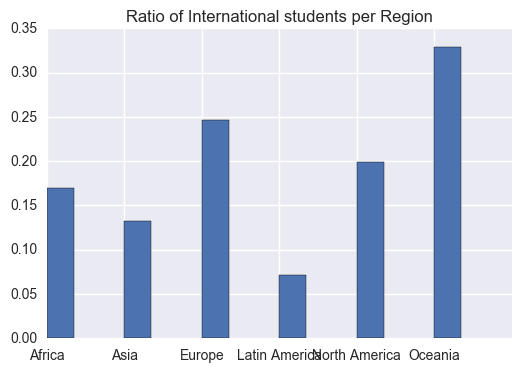

In [103]:
import matplotlib.pyplot as plt
region_agg = universities[0:200].groupby(['region'], as_index=False).mean().groupby('region')['ratioIntStudentmem'].max()
region_agg.sort_values()


plt.bar(range(0,len(region_agg)), region_agg,0.35)
plt.xticks(index, region_agg.keys().tolist())
plt.title('Ratio of International students per Region')


plt.show()

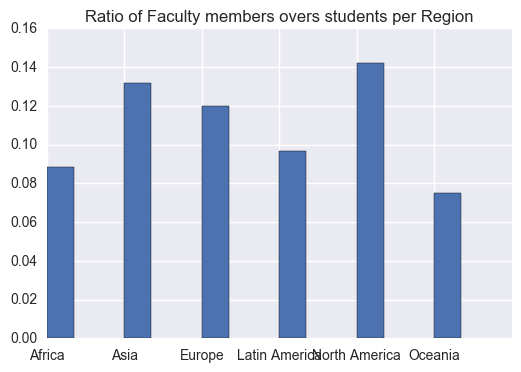

In [102]:

region_fac_agg = universities[0:200].groupby(['region'], as_index=False).mean().groupby('region')['ratioFacultymemStudentmem'].max()
region_fac_agg.sort_values()
plt.bar(range(0,len(region_fac_agg)), region_fac_agg,0.35)
plt.xticks(index, region_fac_agg.keys().tolist())
plt.title('Ratio of Faculty members overs students per Region')
plt.show()

# Exercice 2

In [298]:
## countryURL = 'https://restcountries.eu/rest/v2/name/'


r2 = requests.get(URLTimes)

#soup = BeautifulSoup(page_body, 'html.parser')

universitiesTimes_list = list()
universitiesTimesJson = r2.json().get('data')
for uni in universitiesTimesJson[0:200]:
    #print(uni)
    title                      = uni['name']
    rank                       = uni['rank'].replace('=','')
    country                    = uni['location']
    link                       = uni['url']
    nbstudents_all             = int(uni['stats_number_students'].replace(',',''))
    ratioIntStudentmem         = int(uni['stats_pc_intl_students'].replace('%',''))
    nbstudents_int             = int(ratioIntStudentmem /  100 * nbstudents_all)
    nbfaculty_all              = int(nbstudents_all/ float(uni['stats_student_staff_ratio']))
    ratioFacultymemStudentmem  = nbfaculty_all / nbstudents_all
    if('Korea' in country):
        responseRestServ = requests.get(countryURL+'Korea').json()[0]
    else:
        responseRestServ = requests.get(countryURL+country.replace(' ','%20')).json()[0]
    region           = responseRestServ.get('region')
    if (region == 'Americas'):
        region = responseRestServ.get('subregion')
    
    universitiesTimes_list.append({'title': title,'rank': rank,'country': country, 'region':region
                             ,'nbfaculty_all':nbfaculty_all,'ratioIntStudentmem':ratioIntStudentmem,
                             'nbstudents_all':nbstudents_all,'nbstudents_int':nbstudents_int,
                                  'ratioFacultymemStudentmem':ratioFacultymemStudentmem})  

universitiesTimes = pd.DataFrame.from_dict(universitiesTimes_list)
universitiesTimes.set_index('rank')

,country,nbfaculty_all,nbstudents_all,nbstudents_int,ratioFacultymemStudentmem,ratioIntStudentmem,region,title
rank,,,,,,,,
1,United Kingdom,1822,20409,7755,0.089274,38,Europe,University of Oxford
2,United Kingdom,1687,18389,6436,0.091740,35,Europe,University of Cambridge
3,United States,339,2209,596,0.153463,27,Northern America,California Institute of Technology
3,United States,2112,15845,3485,0.133291,22,Northern America,Stanford University
5,United States,1284,11177,3800,0.114879,34,Northern America,Massachusetts Institute of Technology
6,United States,2283,20326,5284,0.112319,26,Northern America,Harvard University
7,United States,958,7955,1909,0.120427,24,Northern America,Princeton University
8,United Kingdom,1390,15857,8721,0.087658,55,Europe,Imperial College London
9,United States,2181,13525,3381,0.161257,25,Northern America,University of Chicago


In [300]:
universitiesTimes['region']= universities['region'].map(lambda x: x.replace('Northern America','North America'))
universitiesTimes['region']= universities['region'].map(lambda x: x.replace('South America','Latin America'))



universitiesTimes.head()


,country,nbfaculty_all,nbstudents_all,nbstudents_int,rank,ratioFacultymemStudentmem,ratioIntStudentmem,region,title
0,United Kingdom,1822,20409,7755,1,0.089274,38,North America,University of Oxford
1,United Kingdom,1687,18389,6436,2,0.091740,35,North America,University of Cambridge
2,United States,339,2209,596,3,0.153463,27,North America,California Institute of Technology
3,United States,2112,15845,3485,3,0.133291,22,North America,Stanford University
4,United States,1284,11177,3800,5,0.114879,34,Europe,Massachusetts Institute of Technology


In [301]:
problema1Times = universitiesTimes.sort_values(['ratioFacultymemStudentmem'], ascending=False)
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(problema1Times.title[0:10], problema1Times.ratioFacultymemStudentmem[0:10]*100)

105               Vanderbilt University
109            University of Copenhagen
12             Johns Hopkins University
11                      Yale University
153             University of Rochester
97                     Emory University
16                      Duke University
114                 École Polytechnique
183    Scuola Normale Superiore di Pisa
185                 University of Miami
Name: title, dtype: object 105    30.297228
109    24.388880
12     23.254613
11     23.249691
153    23.246160
97     22.721164
16     22.220766
114    19.578421
183    19.223301
185    16.948298
Name: ratioFacultymemStudentmem, dtype: float64


In [302]:
problema2Times = universitiesTimes.sort_values(['ratioIntStudentmem'], ascending=False)
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(problema2Times.title[0:10], problema2Times.ratioIntStudentmem[0:10])

24     London School of Economics and Political Science
178                            University of Luxembourg
37             École Polytechnique Fédérale de Lausanne
7                               Imperial College London
102                               Maastricht University
15                            University College London
143                            University of St Andrews
23                           Carnegie Mellon University
120                     Queen Mary University of London
39                              University of Hong Kong
Name: title, dtype: object 24     71
178    57
37     55
7      55
102    50
15     49
143    48
23     45
120    45
39     42
Name: ratioIntStudentmem, dtype: int64


In [303]:

country_aggTimes = universitiesTimes[0:200].groupby(['country'], as_index=False).mean().groupby('country')['ratioIntStudentmem'].max()
country_aggTimes.sort_values()

country
Taiwan                 8.000000
China                  8.571429
Japan                  9.000000
South Korea            9.000000
Italy                 10.500000
Finland               13.000000
Spain                 14.000000
Sweden                14.000000
Germany               15.200000
Denmark               16.666667
South Africa          18.000000
United States         18.177419
Norway                19.000000
Netherlands           19.230769
Belgium               19.750000
France                20.833333
Russian Federation    22.000000
Canada                22.500000
Austria               26.000000
Ireland               27.000000
New Zealand           29.000000
Singapore             30.500000
Australia             30.750000
Switzerland           31.428571
Hong Kong             32.800000
United Kingdom        36.548387
Luxembourg            57.000000
Name: ratioIntStudentmem, dtype: float64

In [304]:
country_fac_aggTimes = universitiesTimes[0:200].groupby(['country'], as_index=False).mean().groupby('country')['ratioFacultymemStudentmem'].max()
country_fac_aggTimes.sort_values()

country
Belgium               0.026056
Germany               0.027937
Australia             0.038219
Ireland               0.043820
Austria               0.048057
Canada                0.052712
New Zealand           0.053183
Norway                0.053732
Finland               0.055563
Netherlands           0.056471
Hong Kong             0.056606
Singapore             0.060078
Spain                 0.062784
Luxembourg            0.068424
Sweden                0.072451
United Kingdom        0.074225
South Korea           0.080115
Switzerland           0.083422
South Africa          0.085439
Taiwan                0.086939
China                 0.087411
France                0.099272
United States         0.106356
Japan                 0.132086
Russian Federation    0.136954
Italy                 0.138145
Denmark               0.160124
Name: ratioFacultymemStudentmem, dtype: float64

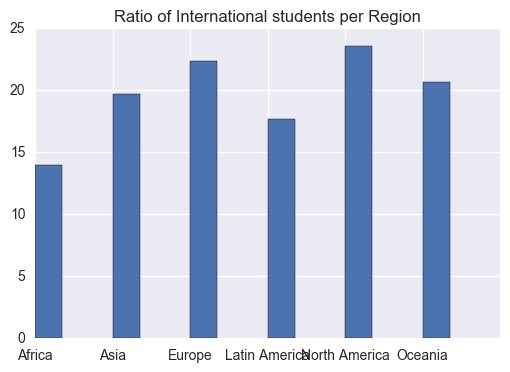

In [305]:
region_aggTimes = universitiesTimes[0:200].groupby(['region'], as_index=False).mean().groupby('region')['ratioIntStudentmem'].max()
region_aggTimes.sort_values()


plt.bar(range(0,len(region_aggTimes)), region_aggTimes,0.35)
plt.xticks(index, region_aggTimes.keys().tolist())
plt.title('Ratio of International students per Region')


plt.show()

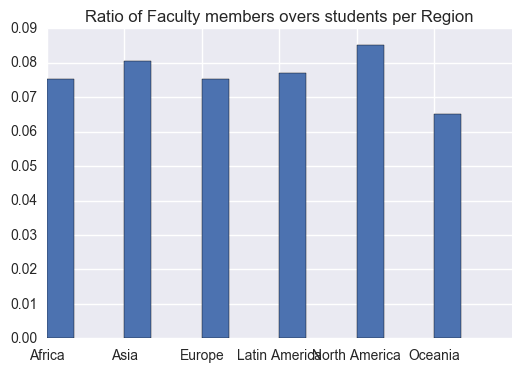

In [306]:

region_fac_aggTimes = universitiesTimes[0:200].groupby(['region'], as_index=False).mean().groupby('region')['ratioFacultymemStudentmem'].max()
region_fac_aggTimes.sort_values()
plt.bar(range(0,len(region_fac_aggTimes)), region_fac_aggTimes,0.35)
plt.xticks(index, region_fac_aggTimes.keys().tolist())
plt.title('Ratio of Faculty members overs students per Region')
plt.show()